practcal 5


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
# Display the dataset and information about it
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
# Select features (Age and EstimatedSalary) and target variable (Purchased)
x = df.loc[:, ['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [5]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [6]:
# Display a sample from the independent variable (features)
print("Independent class", x_train[10])


Independent class [   42 90000]


In [7]:
# Standardize the features using StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
# Create a Logistic Regression model and fit it to the training data
reg = LogisticRegression()
reg.fit(x_train, y_train)


LogisticRegression()

In [9]:
# Make predictions on the test set
y_predict = reg.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
# Display the actual values from the test set
y_test


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
# Calculate and display the accuracy of the model
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.79

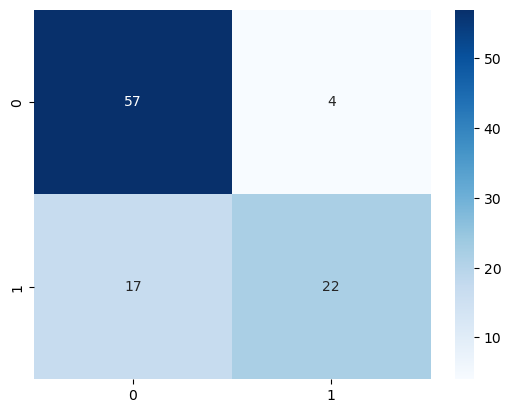

In [12]:
# Visualize the confusion matrix using seaborn
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap='Blues', fmt='g')
plt.show()

In [13]:
# Extract values from the confusion matrix
cm = confusion_matrix(y_test, y_predict)
tp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
tn = cm[0, 0]

In [14]:
# Display True Positive, False Negative, False Positive, and True Negative
print(f"True Positive: {tp}")
print(f"False Negative: {fn}")
print(f"False Positive: {fp}")
print(f"True Negative: {tn}")

True Positive: 22
False Negative: 17
False Positive: 4
True Negative: 57


In [15]:
# Calculate and display recall, precision, accuracy, error rate, and errors
recall = tp / (tp + fn)
precision = tp / (fn + fp)
accuracy = (tp + tn) / (tp + tn + fn + fp)
error_rate = 100 - accuracy
errors = fp + fn


In [16]:
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Errors: {errors} // Unsold houses")

Recall: 0.5641025641025641
Precision: 1.0476190476190477
Accuracy: 0.79
Error Rate: 99.21
Errors: 21 // Unsold houses
